In [1]:
import pickle
import pystan
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("input/data-salary.txt")
df.head()

,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546


In [3]:
data = {
    "N": len(df),
    "X": df["X"],
    "Y": df["Y"],
}
stan_model = pystan.StanModel(file="model/model4-5.stan")
fit = stan_model.sampling(data=data, seed=1234)
with open("output/result-model4-5.pkl", "wb") as f:
    pickle.dump(stan_model, f)
    pickle.dump(fit, f)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_760fa0b78af0bbaaa934d1350faefc45 NOW.


In [4]:
fit

Inference for Stan model: anon_model_760fa0b78af0bbaaa934d1350faefc45.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a     -123.5    2.09  75.46 -277.5 -172.1 -123.1  -73.5  23.41   1303    1.0
b       22.0    0.05   1.68  18.86  20.86  21.98  23.06  25.42   1274    1.0
sigma  85.08    0.43  15.42  61.49  74.07  83.29  93.36 121.48   1299    1.0
lp__  -93.62    0.04   1.33  -97.0 -94.19 -93.27 -92.66 -92.15   1075    1.0

Samples were drawn using NUTS at Mon Feb 19 01:14:43 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

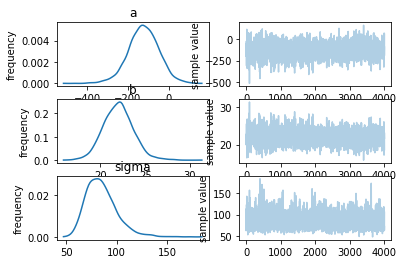

In [5]:
fit.plot()
plt.show()